In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

A government bond is priced at 105%. 
Is the yield to maturity higher or lower than the coupon rate?

# 3.2 Self-Test
A one-year U.S. Treasury bond has a coupon rate of 10%.  
a. What are the cash flows on this bond?  
b. The bond’s yield to maturity is 6%. What is the present value of the bond?  
c. If the yield to maturity is 6%, what return do you earn every 6 months? d. What is the bond’s effective annual rate of return?

In [31]:
#Usually the U.S Treasury bonds coupons are payed twice a year, semiannualy
t = 1  #years to mature
n = 2  #periods of payment
F = 1000  #face value
C = 0.10*F/2  #coupon value
y = 0.06

print("The cashflow is: $", C ," and $",C + F )

def pv_bond(C,F,y,n):
    pv = 0
    CF = 0
    for i in np.arange(1,t*n + 1):
        if i< (t*n):
            CF = C*(1/(1+y/n))**i
        else:
             CF = (C+F)*(1/(1+y/n))**i#last cashflow
        
        pv += CF
    
    return pv

pv_treasury_bond = pv_bond(C,F,y,n)

print("The present value of the treasury bond is: $", f"{pv_treasury_bond:,.2f}")
print("The return i earn every 6 months is ", (y/2)*100 , "%")
print("The bond effective annual rate of return is", f"{((1+y/2)**n -1)*100:,.2f}","%")

The cashflow is: $ 50.0  and $ 1050.0
The present value of the treasury bond is: $ 1,038.27
The return i earn every 6 months is  3.0 %
The bond effective annual rate of return is 6.09 %


# 3.3 Self-Test
a. Which does not change during the bond’s life—the coupon or the yield?  
b. If the yield rises, does the bond price rise or fall?

a. The coupon does not change during the bond's life.  
b. If the yield rises the price bond falls.

# 3.4 Self-Test
If yields decline, which bond is likely to appreciate the most:  
a. A 20-year 8% bond or a 5-year 8% bond?  
b. A 20-year 8% bond or a 20-year 2% bond?  

a. The 20-year 8% bond has a larger duration so the yield decline has a larger effect on the price

b. The 20-year 2% bond has a larger duration so is likely to appreciate the most.

# 3.5 Self-Test  
Suppose that you used the 3.66% yield, calculated earlier, to value a two-year 5% bond.  
a. Would you get the correct answer? If not, why not?  
b. Do you think that you would over- or under-value the bond?  

a.- No, you won’t get the correct value, because proper valuation requires discounting each cash flow at its spot rate.  
b.- If the curve is normal (upward sloping, as is typical), you would overvalue the bond.

# 3.6 Self-Test
Suppose that the 20-year discount factor is 0.3769. What is the 20-year spot rate, r20?


In [4]:
DF_20 = 0.3769

r20 = (1/DF_20)**(1/20) - 1

print(f"The 20-year spot rate, r20 is : {r20:,.2f}")

The 20-year spot rate, r20 is : 0.05


# 1. Bond prices and yields (S3.1) 
A 10-year bond is issued with a face value of \\$1,000, paying interest of \\$60 a year. If interest rates increase shortly after the bond is issued, what happens
to the bond’s  
a. Coupon rate?  
b. Price?  
c. Yield to maturity?  

In [2]:
#a. The coupon rate stayes the same
#b. The price of the bond goes down 
#c. The yield to maturity goes up 

1000.0


# 2. Bond prices and yields (S3.1)
The following statements are true. Explain why.  
a. If a bond’s coupon rate is higher than its yield to maturity, then the bond will sell for more
than face value.  
b. If a bond’s coupon rate is lower than its yield to maturity, then the bond’s price will
increase over its remaining maturity.  

In [4]:
#a. TRUE - If the coupon rate is higher than the yield to maturity, then the bond will sell for more than the face value 
#because investors are paying to receive larger coupon payments compared to the lower yield in the market. 

#b. FALSE - If a bond's coupon rate is lower than its yield to maturity, then the bond's price will increase over it ISN'T remaining 
#maturity because the bond just increases toward par value becasuse i'll be paid back that amount at maturity and no more than that

# 3. Bond prices and yields (S3.1) 
Construct some simple examples to illustrate your answers to the following:  
a. If interest rates rise, do bond prices rise or fall?  
b. If the bond yield to maturity is greater than the coupon, is the price of the bond greater or
less than 100?  
c. If the price of a bond exceeds 100, is the yield to maturity greater or less than the coupon?  
d. Do high-coupon bonds sell at higher or lower prices than low-coupon bonds?  
e. If interest rates change, do the prices of high-coupon bonds change proportionately more
than that of low-coupon bonds?  

a. If the interest rates rises then the bond price fall 
b. If the yield to maturity is greater than the coupon then the bond price is at discount so it is less than 100% of the face value
c. If the price of a bond exceeds a 100 then the yield to maturity is less than the coupon
d. High-coupon bonds sell at higher prices than low-coupon bonds
e. Yes. the prices of high-coupon bonds change proportionately more than that of low-coupon bonds


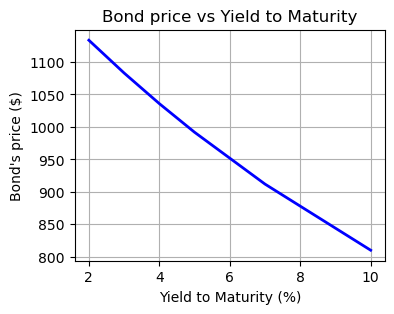

In [35]:
face_value = 1000 #(1 , 1)
ytm = np.array([0.02,0.03,0.04, 0.05,0.07,0.1]) #(4, 1)
i = np.arange(1,len(ytm)+1) #(4, 1)
coupon_rate = 0.05
maturity_years = 3

#suma vectorizada
pv_coupons = np.sum(coupon_rate*face_value*(1/(1+ytm)**i))

pv_facevalue = face_value*(1/(1+ytm)**i[-1])

present_value_bond = pv_coupons + pv_facevalue

plt.figure(figsize=(4,3))
plt.plot(ytm*100, present_value_bond, color ='blue',lw=2)
plt.xlabel("Yield to Maturity (%)")
plt.ylabel("Bond's price ($)")
plt.title("Bond price vs Yield to Maturity")
plt.grid(True)


print("a. If the interest rates rises then the bond price fall ")
print("b. If the yield to maturity is greater than the coupon then the bond price sells at discount (less than 100% of the face value)")
print("c. If the price of a bond exceeds a 100%, then the yield to maturity is less than the coupon rate")
print("d. Given the same maturity and YTM, high-coupon bonds are priced above low-coupon bonds")
print("e. No. The prices of low-coupon bonds change proportionately more than those of high-coupon bonds.")

# 4. Bond prices and yields (S3.1) 
A 10-year German government bond (bund) has a face value of €100 and a coupon rate of 5% paid annually. Assume that the interest rate (in euros) is
equal to 6% per year. What is the bond’s PV?


In [54]:
face_value = 100
coupon_rate = 0.05
coupon_frequency = 1
yield_to_maturity = 0.06
maturity_years = 10
#market_price = 


############################# manual formula ##############################################
#cashflows
coupon = face_value*coupon_rate
i = np.arange(1,maturity_years + 1)  #array for years of maturity
discount_factors = 1 / (1 + yield_to_maturity) ** i #discount factors

#PV odf the coupons + PV face value
pv_coupons = np.sum(coupon*discount_factors)
pv_facevalue =  face_value*(discount_factors[-1])
pv_10year_bond = pv_coupons + pv_facevalue

print(f"The bond's PV is : €{pv_10year_bond:,.2f}")


############################ closed form formula###########################################

#pv of the annuity of coupons
pv_coupons_closed = coupon*(1/ytm - 1/(ytm*(ytm+1)**maturity_years))
pv_facevalue_closed = face_value*(1/(1+ytm)**maturity_years)
pv_10year_bond_closed = pv_coupons_closed + pv_facevalue_closed

print(f"(closed-form formula)The bond's PV is : €{pv_10year_bond:,.2f}")

The bond's PV is : €92.64
(closed-form formula)The bond's PV is : €92.64


# 5. Bond prices and yields (S3.1)
In December 2020, Treasury $4 \tfrac{1}{4}\%$  of 2040 offered a semiannually compounded yield to maturity of 1.32%. Recognizing that coupons are paid semiannually, calculate the bond’s price.

In [71]:
coupon_rate = 0.0425
coupon_frequency = 2
yield_to_maturity = 0.0132
maturity_years = 20
face_value = 100

########################### manual form ############################

coupon_per_period = coupon_rate * face_value/coupon_frequency
i = np.arange(1 , maturity_years*coupon_frequency + 1)
discount_factors = 1/( 1 + yield_to_maturity/coupon_frequency)**i

#pv of the stream of coupons + pv facevalue
pv_coupons = np.sum(coupon_per_period*discount_factors)
pv_facevalue = face_value*(1/(1+ yield_to_maturity/coupon_frequency)**(maturity_years*coupon_frequency))
pv_bond = pv_coupons + pv_facevalue
print(f"The bond's price is ${pv_bond:,.2f}")

########################### manual form ############################


The bond's price is $151.35
